Hi,

and welcome to the R project specification document! There are two parts that are to be completed in this notebook:

1. **Project info**:  The title of the project, a project description, assumed student background, etc.
2. **Project narrative intro**: The three first text + code cells that will form the introduction of the in-project narrative notebook.

When you are happy with this project spec, just e-mail the Jupyter notebook to me as an attachment. 

There are also examples and instructions (*as this you are reading right now*) scattered all over the notebook. Please feel free to remove all of that before sending in the project spec. Also, if you have any questions, feel free to reach out to me at any time!

All best,<br>
Rasmus Bååth<br>
rasmus@datacamp.com

# 1. Project info

**Project title**: Uncertainty assessment of vadose zone soil hydraulic properties with hysteretic and natural boundary conditions and its effect on groundwater recharge estimation. A case study in Nzelele catchment, South Africa 

**Name:**  Ivo, Arrey

**E-mail:** arreyves@gmail.com

**Short description**: Use a linear regression model to understand the Powers of the "Rain Queen" to predict rain. 

#### Long description ####

The Modjadji or Rain Queen is the hereditary queen of the Balobedu, a people of the Limpopo Province of South Africa. According to their custom, she has mystical rain making powers which is believed to be reflected in the lush garden that surrounds her royal compound. In this R project, we will develop a simple linear regression model to establish the relationship between the volumetric soil water content and soil temperature data collected in her garden in order to predict her rain making events. This project assumes prior knowledge of DataCamp's Correlation and Regression courses as well as the tidyverse course.    

#### Datasets used ####

The data used for this project was collected from a monitoring weather station and soil moisture probe around the Rain Queen's lush garden. The link to the weather file can be found on this link https://github.com/arreyves/Open-Olifants/blob/master/Lushgarden_data.csv 

#### Assumed student background ####

The student is expected to know how to read in a csv file as a data frame and how to compute grouped summary statistics and can inspect, and export `csv` files. He/She should be familiar with the tidyverse package most importantly knows how to manipulate and analyze data with 'dplyr' together with visualization techniques with 'ggplot'. The student should also be familiar with the 'broom' and 'modelr' packages used to tidy model outputs and pipeline modeling respectively. 



# 2. Project narrative intro

<i>
A final DataCamp project consists of two parts

1. **A narrative notebook**. This is the self-contained data analysis/story/narrative that will be displayed as the actual Jupyter notebook in the final DataCamp project.
2. **Supporting information**: task instructions, hints, sample code and correctness checks.

The narrative notebook is written from the perspective of the data analyst and it should stand on its own (rule of thumb: It should be publishable as is on a blog). It should be structured around 8-10 "tasks", where each task consists of a title, a text cell, and a code cell.

This section should contain the introduction of the narrative notebook: The three first tasks. See further down for an example introduction. If the code loads in external data make sure to attach it when you email me the notebook.
</i>

## 1. *Exploring Our Data*

<img style="float: left;margin:5px 15px 5px 1px" src="http://rainqueensofafrica.com/wp-content/uploads/2003/04/Rain-Queen-Modjadji-VI.jpg">                       

The Modjadji or Rain Queen is the hereditary queen of Balobedu, a people of the Limpopo Province of South Africa. She is believed to have special powers, including the ability to control the clouds and rainfall. 
A number of stories relating to the creation and history of the Rain Queens of Balobedu exist. The most fascinating involves a scandal in the chief's house where the chief's son impregnated his sister, Dzugundini and she was chased from the village. She moved with her loyal followers to another village, but the peace and harmony there was disrupted by rivalries between different families, and therefore to pacify the land, the Mugudo (male leader) impregnated his own daughter to restore the tribe's matrilineal tradition. She gave birth to the first Rain Queen known as Modjadji which means; "ruler of the day".

As part of our endeavor to understand the Rain Queen's majical powers, we installed a weather station and a soil moisture neutron probe at the centre of the garden. These were to provide us with basic data for rainfall and volumetric soil water content at 30 cm intevals from the surface to a depth of 90 cm hourly. We will begin by looking at the data set obtained from the lush garden of the Rain Queen.  

The data set contains hourly data for rainfall in mm/hr, soil moisture in cm3/cm3, soil temperature in oC, and depth in cm from 25th April at 23:00 to 22 October 2013 at 22:00. We will make use of a few packages that provide data manipulation, visualization, pipeline modeling functions, and model output tidying functions.

In [10]:

library(tidyverse)
library(modelr)
library(broom)
mydata <- read.csv("/home/ivo/Downloads/Lushgarden_data.csv", stringsAsFactors=F) %>% select(-X, -X.1, -X.2, -X.3)


## 1.2 *Preparing our Data*

Before diving into constructing our predictive model to match the Rain Queen's powers, it is good practice to first discover relationships in our data set. To do this, we will split our data into a training and test data set of 60% and 40% respectively.The training data set will be used to discover any relationships while the test data set will be used to verfy the models performance. We will split understand the variables visually. This will help us identify trends in the soil moisture fluctuation in the garden at various depths with time. 

In [50]:
sample <- sample(c(T,F), nrow(mydata), replace=T, prob=c(0.6,0.4))
train <- mydata[sample,]
test <- mydata[!sample,]

## Graphical Representation of Variables*

To help us understand our data properly, it is best visualize the variables of the train data set using graphs to understand their distribution and frequency. We can see from our plot that the bulk of our data lies at the 90 cm depth, hence we will focus our exploration at this depth.

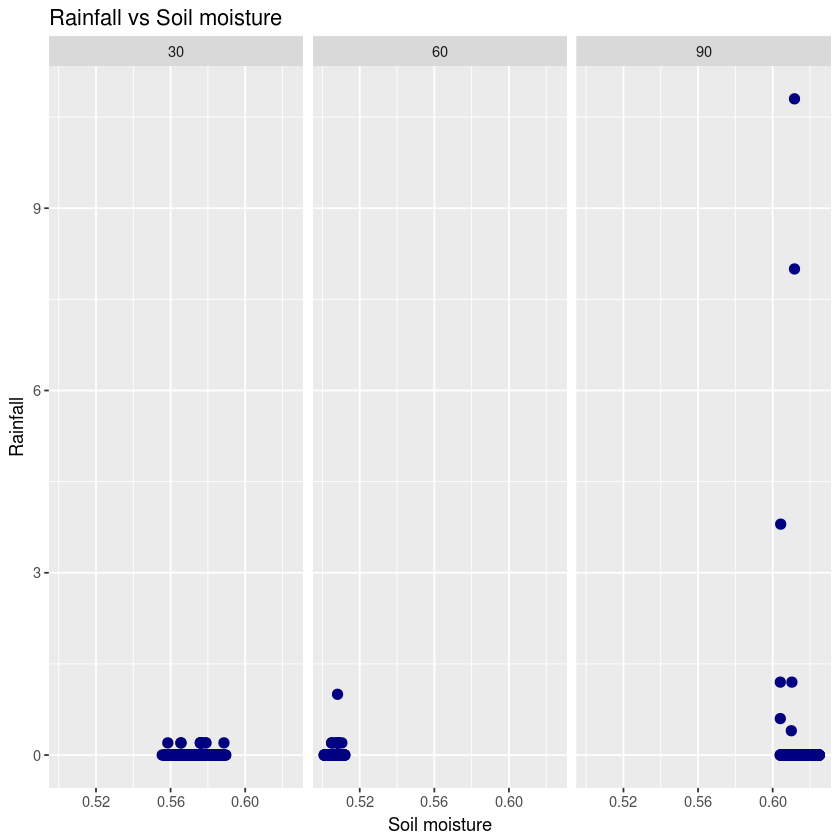

In [51]:
ggplot(train, aes(x=Soil.moisture, y=Rainfall)) + geom_point(size=2.5, color="navy") + xlab("Soil moisture") + ylab("Rainfall") + ggtitle("Rainfall vs Soil moisture") +  facet_wrap(~Depth)

## 1.3 *Building our Model*

To build our model in R, we use the formula Y~X where Y will represent our dependent variable (Rainfall) and X the independent variable (soil moisture). We will now select from our training data set, only values for the 90 cm depth and fit our linear model with the form Y = β0 + β1X + ϵ.
Where 
β0 is the intercept
β1 is the coefficient representing the linear relationship
ϵ is the mean-zero random error term 

In [52]:
train1 <- train%>%filter(Depth==90)
test1 <- test%>%filter(Depth==90)
model1 <- lm(Rainfall~Soil.moisture, data=train1)
summary(model1)
tidy(model1)



Call:
lm(formula = Rainfall ~ Soil.moisture, data = train1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.0946 -0.0696 -0.0525 -0.0234 10.7440 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)      3.126      2.727   1.146    0.252
Soil.moisture   -5.018      4.444  -1.129    0.259

Residual standard error: 0.5976 on 551 degrees of freedom
Multiple R-squared:  0.002309,	Adjusted R-squared:  0.000498 
F-statistic: 1.275 on 1 and 551 DF,  p-value: 0.2593


term,estimate,std.error,statistic,p.value
(Intercept),3.125666,2.726610,1.146356,0.2521454
Soil.moisture,-5.018241,4.444218,-1.129162,0.2593210


If we look at our model results, the intercept estimate is 3.12 and coefficient of the linear relationship is -5.02 giving the form Y = 3.12-5.02X + e. In otherwords, when there is no soil moisture, we can still expect to have 3.12 mm of rainfall. This sounds too good to be true for a semi-arid area where the Rain Queen's lush garden is found and so we would be interested in looking at the model's accuracy also known as its goodness-of-fit. This is given in R-squared and F-statistic. Our model says only 0.2% of soil moisture data can explain the rainfall events predicted by the Queen. This suggests we need to extend our simple linear regression model to include multiple predictors. But before then, lets test our models prediction strength with the test data.

## 1.4 *Making Predictions*

The primary concern is to assess if the out-of-sample mean squared error (MSE), also known as the mean squared prediction error, is substantially higher than the in-sample mean square error, as this is a sign of deficiency in the model.

In [53]:
test1 <- test1 %>% 
  add_predictions(model1)
head(test1)

Time,Rainfall,Soil.moisture,Ambient.temp,Depth,pred
9/14/2013 18:00,0,0.6242,25.2,90,-0.0067197364
9/14/2013 19:00,0,0.6237,25.2,90,-0.0042106160
9/14/2013 21:00,0,0.6232,25.2,90,-0.0017014957
9/14/2013 22:00,0,0.6232,25.3,90,-0.0017014957
9/15/2013 0:00,0,0.6230,25.3,90,-0.0006978475
9/15/2013 2:00,0,0.6228,25.3,90,0.0003058006


In [54]:
test1 %>%   add_predictions(model1) %>%   summarise(MSE = mean((Rainfall - pred)^2))
train1 %>%  add_predictions(model1) %>%   summarise(MSE = mean((Rainfall - pred)^2))  

MSE
0.01997803


MSE
0.355881


## 1.5 *Multiple Regression*

Our simple linear model above suggests that we need more variables to be able to increase the model accuracy. Fortunately for us, we still have the Ambient soil temperature data as another variable predictor for our model. In this case, our new multiple regression model takes the form Y = β0 + β1X1 + β1X2 + ... + βpXp + ϵ
where Xj represents the jth predictor and βj quantifies the association between that variable and the response. We interpret βj as the average effect on Y of a one unit increase in Xj, holding all other predictors fixed. Hence, our new model;

In [57]:
model2 <- lm(Rainfall~Soil.moisture + Ambient.temp, data=train1)
summary(model2)


Call:
lm(formula = Rainfall ~ Soil.moisture + Ambient.temp, data = train1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.0793 -0.0711 -0.0600 -0.0286 10.7371 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)    1.67471    5.18437   0.323    0.747
Soil.moisture -4.15396    5.16504  -0.804    0.422
Ambient.temp   0.03615    0.10983   0.329    0.742

Residual standard error: 0.5981 on 550 degrees of freedom
Multiple R-squared:  0.002505,	Adjusted R-squared:  -0.001122 
F-statistic: 0.6906 on 2 and 550 DF,  p-value: 0.5017


*To be continued...*